In [126]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import warnings

In [127]:
warnings.filterwarnings('ignore')

In [128]:
def load_data(filename):
    path = os.path.join('Data')
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

In [132]:
train = load_data('train.csv')
train_labels = train['Survived']
test = load_data('test.csv')

In [133]:
train = train.drop(['Survived', 'Name', 'PassengerId', 'Embarked'], axis = 1)
train['Sex'] = train['Sex'].replace('male', 1)
train['Sex'] = train['Sex'].replace('female', 0)

test = test.drop(['Name', 'PassengerId'], axis = 1)
test['Sex'] = test['Sex'].replace('male', 1)
test['Sex'] = test['Sex'].replace('female', 0)

In [134]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,0,35.0,1,0,113803,53.1000,C123,S
4,3,1,35.0,0,0,373450,8.0500,NaN,S


In [135]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,0,35.0,1,0,113803,53.1000,C123,S
4,3,1,35.0,0,0,373450,8.0500,NaN,S


In [136]:
train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
#People who didin't survive
train[train_labels == 1].describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,342.000000,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408
std,0.863321,0.466660,14.950952,0.708688,0.771712,66.596998
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,19.000000,0.000000,0.000000,12.475000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,26.000000
75%,3.000000,1.000000,36.000000,1.000000,1.000000,57.000000
max,3.000000,1.000000,80.000000,4.000000,5.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81592f4c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f815923bc88>]], dtype=object)

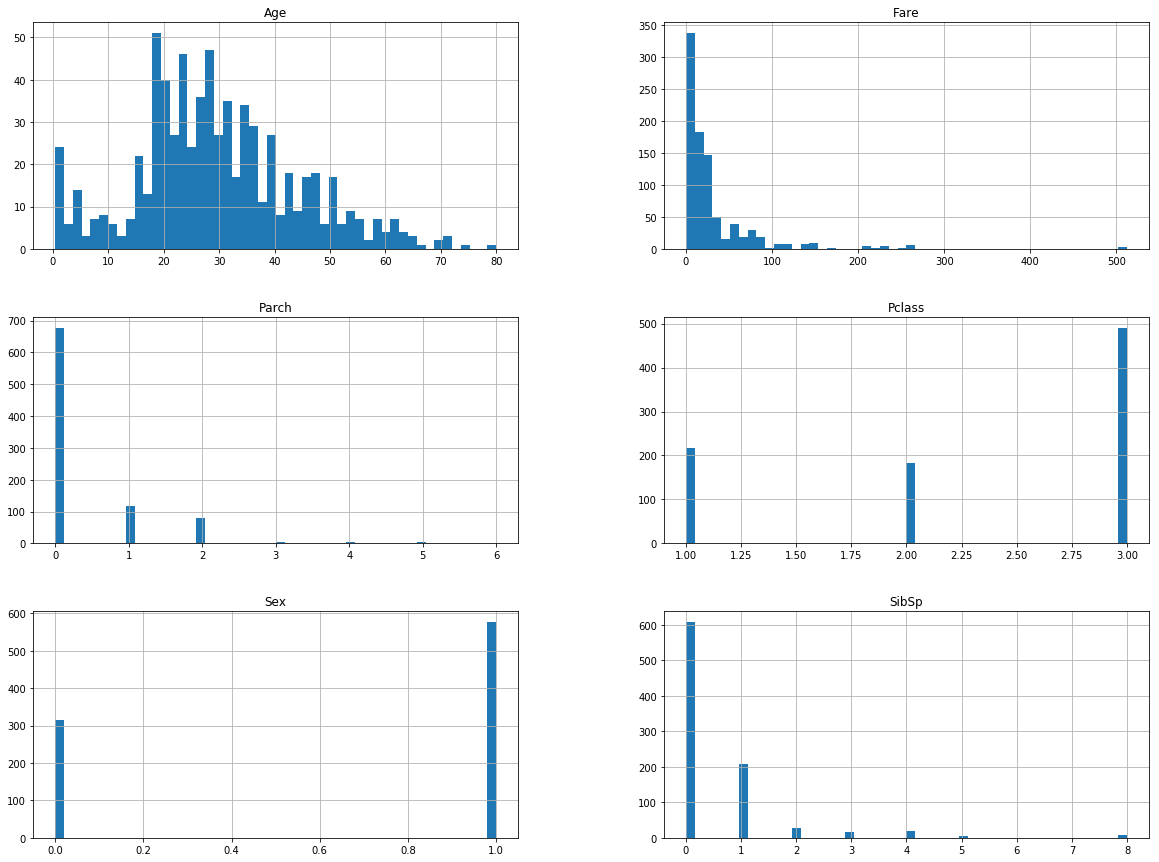

In [139]:
train.hist(bins = 50, figsize = (20,15))

In [140]:
from sklearn.linear_model import Perceptron

In [141]:
per_clf = Perceptron()
per_clf.fit(train, train_labels)
per_clf.score(train, train_labels)

ValueError: could not convert string to float: 'Q'

In [102]:
from sklearn.model_selection import cross_val_score

cross_val_score(per_clf, train, train_labels, cv = 5)

array([ 0.61452514,  0.38547486,  0.78651685,  0.75280899,  0.78531073])